In [1]:
#!pip install seaborn

Partie Data science
Stats et visualisation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'anova.png',
 'data.csv',
 'enonce_test_technique.docx',
 'heat_map.png',
 'spearman.png',
 'swisslife_sylvain.ipynb',
 '~$once_test_technique.docx']

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
import datetime
df['hour'] = df['datetime'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
df['month'] = df['datetime'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
df['weekday'] = df['datetime'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())

In [7]:
categorical = ['season', 'holiday', 'workingday', 'weather','hour','month','weekday']
numerical = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

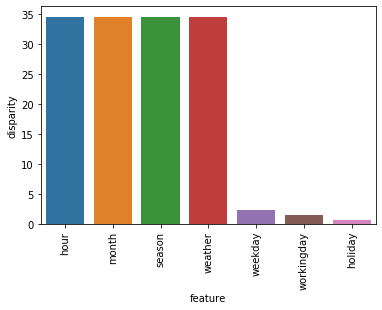

In [31]:
import scipy.stats as stats
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical
    pvals = []
    for c in categorical:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['count'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
a['disparity'] = np.log(1./(a['pval'].values+1.e-15))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.savefig("anova.png", dpi=300, bbox_inches='tight')

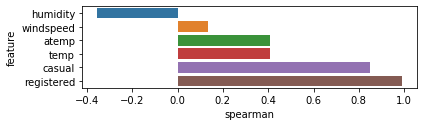

In [10]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['count'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    plt.savefig("spearman.png", dpi=300, bbox_inches='tight')
    return spr
    
spr = spearman(df, numerical)

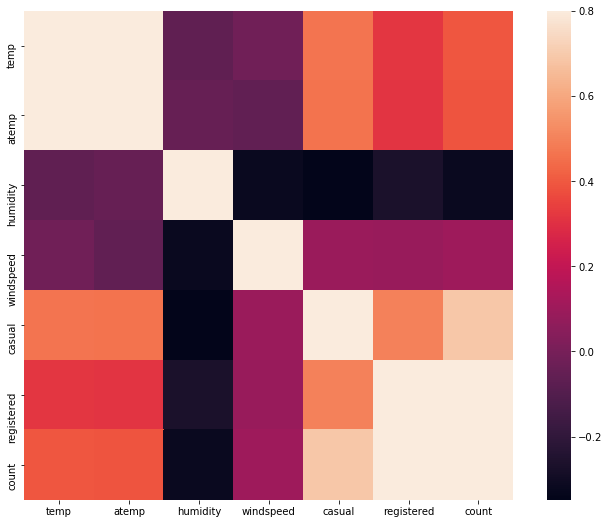

In [11]:
#correlation matrix
corrmat = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
f, ax = plt.subplots(figsize=(12, 9))
g = sns.heatmap(corrmat, vmax=.8, square=True);
plt.savefig("heat_map.png", dpi=300, bbox_inches='tight')

Pour la question 2, je ferais un test de Kolmogorov-Smirnov.

In [12]:
(~(df['registered']+df['casual']==df['count'])).any()

False

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5


Partie ML

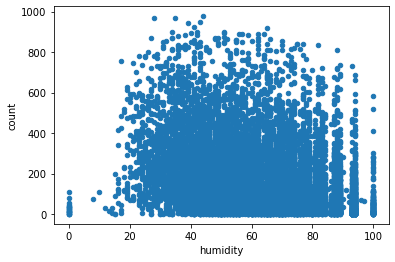

In [14]:
df.plot.scatter(y='count',x='humidity')

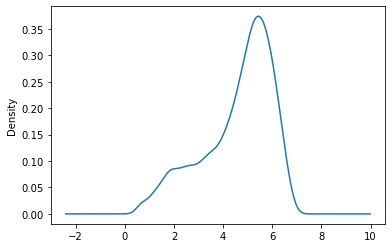

In [15]:
np.log1p(df['count']).plot(kind="kde")

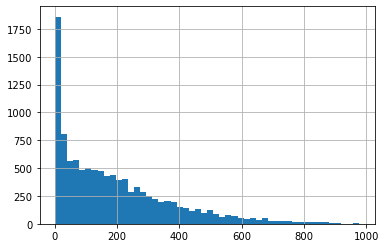

In [16]:
df['count'].hist(bins=50)

In [17]:
df_all = df[['season','weather','temp', 'humidity', 'windspeed', 'count','hour','month','weekday']].copy()

In [18]:
#feature engineering
df_all['isSpring'] = df_all["season"].apply(lambda x:1.0 if x==1 else 0.0)
df_all['isSummer'] = df_all["season"].apply(lambda x:1.0 if  x==2 else 0.0)
df_all['isAutumn'] = df_all["season"].apply(lambda x:1.0 if  x==3 else 0.0)
df_all['isWinter'] = df_all["season"].apply(lambda x:1.0 if  x==4 else 0.0)

df_all['isSunny'] = df_all["weather"].apply(lambda x:1.0 if x==1 else 0.0)
df_all['isCloudy'] = df_all["weather"].apply(lambda x:1.0 if x==2 else 0.0)
df_all['isRainy'] = df_all["weather"].apply(lambda x:1.0 if x==3 else 0.0)
df_all['isSnowy'] = df_all["weather"].apply(lambda x:1.0 if x==4 else 0.0)

for x in range(24):
    df_all['is'+str(x)+'hour'] = df_all['hour'].apply(lambda y: 1.0 if y==x else 0.0)
#for x in range(1,12):
#    df_all['is'+str(x)+'month'] = df_all['month'].apply(lambda y: 1.0 if y==x else 0.0)
for x in range(7):
    df_all['is'+str(x)+'weekday'] = df_all['weekday'].apply(lambda y: 1.0 if y==x else 0.0)

df_all.drop(columns=['season', 'weather'], inplace = True)

In [19]:
df_all.columns

Index(['temp', 'humidity', 'windspeed', 'count', 'hour', 'month', 'weekday',
       'isSpring', 'isSummer', 'isAutumn', 'isWinter', 'isSunny', 'isCloudy',
       'isRainy', 'isSnowy', 'is0hour', 'is1hour', 'is2hour', 'is3hour',
       'is4hour', 'is5hour', 'is6hour', 'is7hour', 'is8hour', 'is9hour',
       'is10hour', 'is11hour', 'is12hour', 'is13hour', 'is14hour', 'is15hour',
       'is16hour', 'is17hour', 'is18hour', 'is19hour', 'is20hour', 'is21hour',
       'is22hour', 'is23hour', 'is0weekday', 'is1weekday', 'is2weekday',
       'is3weekday', 'is4weekday', 'is5weekday', 'is6weekday'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
y = df_all['count']
X = df_all[['temp', 'humidity', 'windspeed', 
       'isSpring', 'isSummer', 'isAutumn', 'isWinter', 'isSunny', 'isCloudy',
       'isRainy', 'isSnowy', 'is0hour', 'is1hour', 'is2hour', 'is3hour',
       'is4hour', 'is5hour', 'is6hour', 'is7hour', 'is8hour', 'is9hour',
       'is10hour', 'is11hour', 'is12hour', 'is13hour', 'is14hour', 'is15hour',
       'is16hour', 'is17hour', 'is18hour', 'is19hour', 'is20hour', 'is21hour',
       'is22hour', 'is23hour', 'is0weekday', 'is1weekday', 'is2weekday',
       'is3weekday', 'is4weekday', 'is5weekday', 'is6weekday']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
#from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=False)
#transformer = QuantileTransformer(output_distribution='normal')

In [22]:
from sklearn import linear_model

pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), 
                           ('model', TransformedTargetRegressor(regressor=linear_model.BayesianRidge(), 
                                                                transformer=transformer) 
                            )])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_score(y_pred, y_test)

0.34143689717327197

In [23]:
from sklearn import svm
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), 
                           ('model', TransformedTargetRegressor(regressor=svm.SVR(), 
                                                                transformer=transformer) 
                            )])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_score(y_pred, y_test)

C:\Users\gavoi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4193418338667627

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), 
                           ('model', TransformedTargetRegressor(regressor=GradientBoostingRegressor(), 
                                                                transformer=transformer) 
                            )])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_score(y_pred, y_test)

0.16375335204281505

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), 
                           ('model', TransformedTargetRegressor(regressor=RandomForestRegressor(n_estimators=100), 
                                                                transformer=transformer) 
                            )])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_score(y_pred, y_test)


0.7536150024983721

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
hour          10886 non-null int64
month         10886 non-null int64
weekday       10886 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 1.2+ MB


np.log1p fonctionne bcp mieux

R2 score est justifié pour une régression. Il est facile à interpréter et permet de voir facilemenr la régression réalisée est correcte.
En termes d'amélioration, il faudrait collecter d'autres types de données. Avoir plus de données.

INNER LEFT RIGHT FULL mettre la figure

DROP supprime une table ou une database alors que TRUNCATE supprime les données et garde la structure

Une fonction lambda est une fonction anonyme
exemple:
x = lambda a : a + 10
print(x(5))



si vos données sont difficilement stockables sous forme tabulaire ou interrogeables en langage SQL, regardez donc du côté du NoSQL.

1. Spark Release

RDD – The RDD APIs have been on Spark since the 1.0 release.
DataFrames – Spark introduced DataFrames in Spark 1.3 release.
2. Schema Projection

RDD – In RDD APIs use schema projection is used explicitly. Hence, we need to define the schema (manually).
DataFrame – Auto-discovering the schema from the files and exposing them as tables through the Hive Meta store. We did this to connect standard SQL clients to our engine. And explore our dataset without defining the schema of our files.
3. Aggregation

RDD – RDD API is slower to perform simple grouping and aggregation operations.
DataFrame – DataFrame API is very easy to use. It is faster for exploratory analysis, creating aggregated statistics on large data sets.
4. Data Formats

RDD – It can easily and efficiently process data which is structured as well as unstructured. But like Dataframe and DataSets, RDD does not infer the schema of the ingested data and requires the user to specify it.
DataFrame – It can process structured and unstructured data efficiently. It organizes the data in the named column. DataFrames allow the Spark to manage schema.
5. Immutability and Interoperability

RDD – RDDs contains the collection of records which are partitioned. The basic unit of parallelism in an RDD is called partition. Each partition is one logical division of data which is immutable and created through some transformation on existing partitions. Immutability helps to achieve consistency in computations.
DataFrame – After transforming into DataFrame one cannot regenerate a domain object. For example, if you generate testDF from testRDD, then you won’t be able to recover the original RDD of the test class.
There are many more differences between RDD and DataFrame, to learn all, follow link RDD vs DataFrame

Hybrid cloud is a cloud computing environment that uses a mix of on-premises, private cloud and third-party, public cloud services with orchestration between the two platforms. By allowing workloads to move between private and public clouds as computing needs and costs change, hybrid cloud gives businesses greater flexibility and more data deployment options.
Hybrid cloud architecture

Establishing a hybrid cloud requires the availability of:

A public infrastructure as a service (IaaS) platform, such as Amazon Web Services, Microsoft Azure or Google Cloud Platform;
The construction of a private cloud, either on premises or through a hosted private cloud provider;
And adequate wide area network (WAN) connectivity between those two environments.

Typically, an enterprise will choose a public cloud to access compute instances, storage resources or other services, such as big data analytics clusters or serverless compute capabilities.

Pourquoi le subnetting est si important ?

Les séries de nombres, les conversions binaires et les comparaisons logiques ont un effet dissuasif. Surtout dans le contexte de la conversion IPv6, certains pourraient se demander : est-ce que cela en vaut vraiment la peine ? La réponse est oui ! Voici pourquoi le subnetting reste même à l’avenir utile :

    Extension de la plage d’adresses au sein du réseau : avec le subnetting, l’administrateur réseau peut décider de la taille de ses réseaux.

    Connexion rapide entre les hôtes d’un sous-réseau : les paquets de données sont envoyés directement de l’expéditeur au destinataire et ne sont pas acheminés par le routeur via l’ensemble du réseau.

    Amélioration de l’organisation logique des utilisateurs du réseau : afin de garder un meilleur aperçu des hôtes, il est judicieux de segmenter par critères locaux (différents bâtiments ou étages) ou par départements.

    Plus de sécurité : si un réseau externe est attaqué, tout le réseau est alors rapidement menacé. Le subnetting permet justement aux administrateurs réseau de séparer plus facilement les sous-réseaux. 

select count(IF(valeur_total > 0 and valeur_total <= 50, 1, NULL)) as count_0_50,count(IF(valeur_total > 50 and valeur_total <= 100, 1, NULL)) as count_50_100,count(IF(valeur_total > 100, 1, NULL)) as count_100_inf 
FROM table

Tester sur mon serveur SQL

https://medium.com/@natekupp/getting-started-the-3-stages-of-data-infrastructure-556dac82e825
https://www.mckinsey.com/business-functions/mckinsey-digital/our-insights/cloud-adoption-to-accelerate-it-modernization
https://cloud.google.com/solutions/big-data/stream-analytics/


https://www.upsolver.com/blog/streaming-data-architecture-key-components